1. import library

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

2. data cleaning

In [17]:
df = pd.read_csv(r"C:\Users\muham\OneDrive\Dokumen\DataAnalisis\data\sales_performance.csv")

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   invoice_id       750 non-null    object
 1   invoice_date     750 non-null    object
 2   customer_id      750 non-null    object
 3   customer_type    750 non-null    object
 4   product_name     750 non-null    object
 5   category         750 non-null    object
 6   unit_price       750 non-null    int64 
 7   quantity         750 non-null    int64 
 8   store_name       750 non-null    object
 9   city             750 non-null    object
 10  gross_amount     750 non-null    int64 
 11  discount_amount  750 non-null    int64 
 12  created_by       750 non-null    object
dtypes: int64(4), object(9)
memory usage: 76.3+ KB


In [19]:
df.head()

,invoice_id,invoice_date,customer_id,customer_type,product_name,category,unit_price,quantity,store_name,city,gross_amount,discount_amount,created_by
0,INV000642,11-05-2024,C001,Online,Kids Fashion Series,Kids,99000,9,RetailCo Plaza Jakarta,Jakarta,891000,193200,andika
1,INV000611,10-06-2024,C001,Online,Hijab & Scarf Series,Modest Wear,149000,4,RetailCo Mall Bandung,Bandung,596000,86900,gita
2,INV000594,26-03-2024,C001,Online,Sling Bags & Clutches,Bags,149000,2,RetailCo Denpasar Point,Denpasar,298000,36800,dwi
3,INV000530,28-09-2024,C001,Online,Sling Bags & Clutches,Bags,149000,4,RetailCo Plaza Jakarta,Jakarta,596000,21900,fajar
4,INV000328,08-02-2024,C001,Online,Prayer Sets & Mukena,Modest Wear,349000,3,RetailCo Plaza Jakarta,Jakarta,1047000,162700,dwi


In [20]:
df['invoice_date'] = pd.to_datetime(df['invoice_date'], dayfirst=True, errors='coerce')
df['unit_price'] = df['unit_price'].astype(int)
df['gross_amount'] = df['gross_amount'].astype(int)
df['discount_amount'] = df['discount_amount'].astype(int)

In [23]:
df.isnull().sum()

invoice_id         0
invoice_date       0
customer_id        0
customer_type      0
product_name       0
category           0
unit_price         0
quantity           0
store_name         0
city               0
gross_amount       0
discount_amount    0
created_by         0
dtype: int64

In [24]:
df.duplicated().sum()

np.int64(0)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   invoice_id       750 non-null    object        
 1   invoice_date     750 non-null    datetime64[ns]
 2   customer_id      750 non-null    object        
 3   customer_type    750 non-null    object        
 4   product_name     750 non-null    object        
 5   category         750 non-null    object        
 6   unit_price       750 non-null    int64         
 7   quantity         750 non-null    int64         
 8   store_name       750 non-null    object        
 9   city             750 non-null    object        
 10  gross_amount     750 non-null    int64         
 11  discount_amount  750 non-null    int64         
 12  created_by       750 non-null    object        
dtypes: datetime64[ns](1), int64(4), object(8)
memory usage: 76.3+ KB


3. exploratory data analysis

In [27]:
df[['unit_price', 'quantity', 'gross_amount', 'discount_amount']].describe()

,unit_price,quantity,gross_amount,discount_amount
count,750.00000,750.000000,7.500000e+02,7.500000e+02
mean,221200.00000,5.628000,1.230705e+06,1.343787e+05
std,85947.71286,2.862028,8.099729e+05,1.383898e+05
min,99000.00000,1.000000,9.900000e+04,0.000000e+00
25%,149000.00000,3.000000,5.970000e+05,3.255000e+04
50%,199000.00000,6.000000,1.043000e+06,9.715000e+04
75%,299000.00000,8.000000,1.743000e+06,1.917750e+05
max,349000.00000,10.000000,3.490000e+06,1.221100e+06


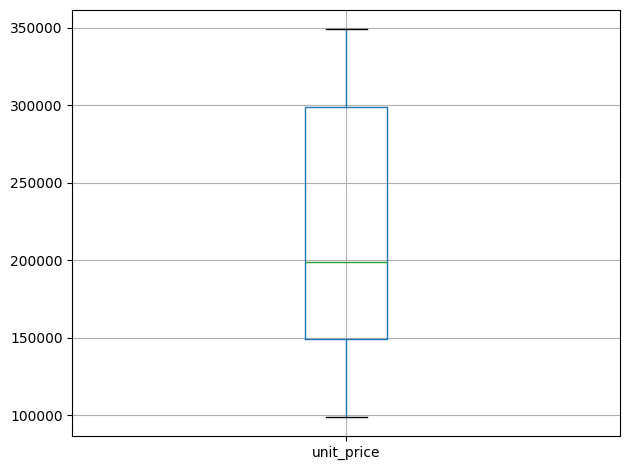

In [28]:
df.boxplot(column='unit_price')
plt.tight_layout()
plt.show()

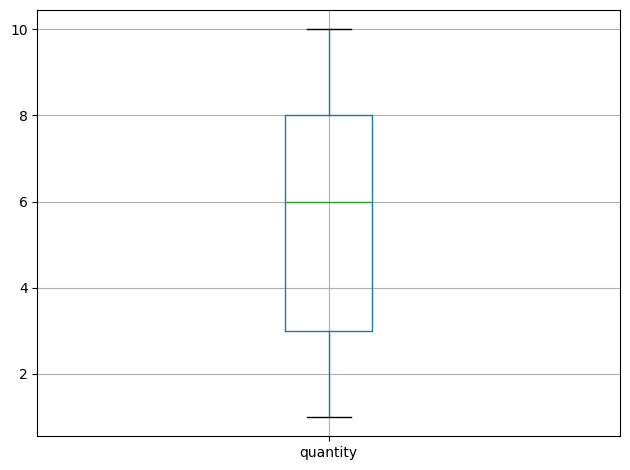

In [29]:
df.boxplot(column='quantity')
plt.tight_layout()
plt.show()

3.1 terdapat outlier pada kolom gross_amount, setelah dilakukan pengecekan di mysql via dbeaver. setelah dilakukan verifikasi, data tersebut valid dan berasal dari berbagai kanal penjualan (retail, online, wholesale). hal ini mengindikasikan adanya permintaan permintaan produk premium dengan volume yang tinggi. hal ini menjadi indikator performa positif yang menunjukkan daya beli konsumen yang kuat untuk perusahaan

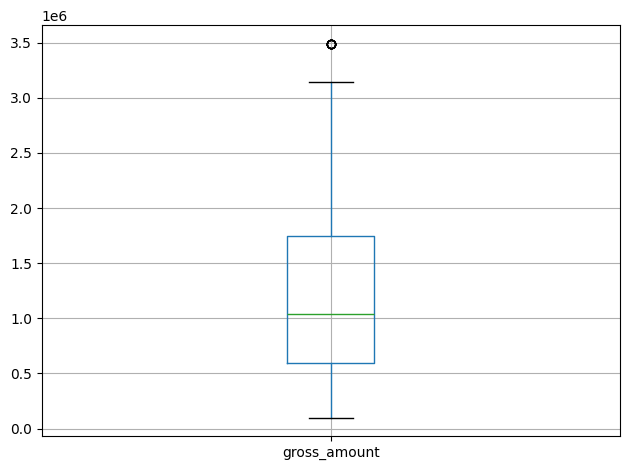

In [33]:
df.boxplot(column='gross_amount')
plt.tight_layout()
plt.show()

ditemukan anomali pada satu transaksi retail dengan tingkat diskon ekstrem sebesar 50%. mengingat rata-rata diskon populasi hanya sekitar 10-20%, transaksi ini diidentifikasi sebagai risiko kontrol (potensi kesalahan input atau penyalahgunaan wewenang) yang memerlukan verifikasi manajerial dalam skenario industri nyata

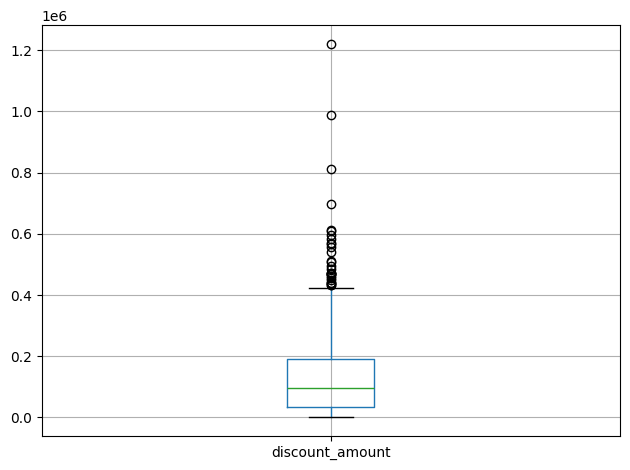

In [34]:
df.boxplot(column='discount_amount')
plt.tight_layout()
plt.show()

transaksi wholesale cenderung berkelompok stabil, sedangkan retail dan online memiliki rentang diskon yang lebar. ini menjadi validitas bahwa outlier ekstrem tersebut perlu dilakukan verifikasi manajerial dalam skenario industri nyata, diskon tersebut adalah diskon manual, promo khusus yang tidak merata, atau sebuah kesalahan input

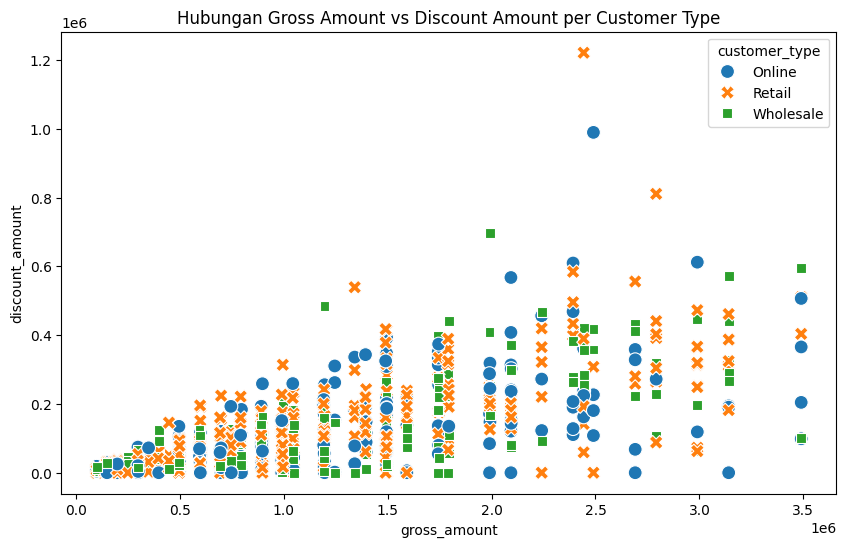

In [35]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='gross_amount', y='discount_amount', hue='customer_type', style='customer_type', s=100)
plt.title('Hubungan Gross Amount vs Discount Amount per Customer Type')
plt.show()

1. korelasi tinggi 0.74 pada gross amount & quantity = volume barang adalah penentu utama nilai penjualan
2. korelasi moderat 0.66 pada gross amount & discount amount = menunjukkan transaksi besar cenderung menerima nominal diskon lebih tinggi

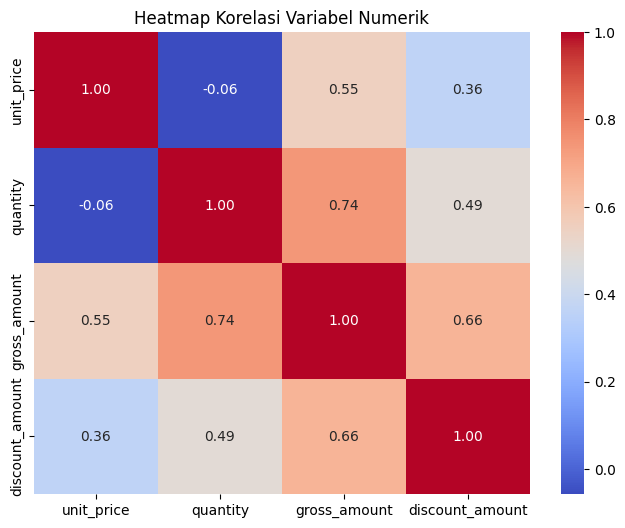

In [37]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['unit_price', 'quantity', 'gross_amount', 'discount_amount']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi Variabel Numerik')
plt.show()

4. selesai

In [38]:
df.to_csv('retail_final_cleaned.csv', index=False)